### Assignment-1

1. How many unique values are there in categorical columns like `City`, `State`, and `Weather_Condition`? Which category is the most frequent in each?

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd

file_path = '/content/drive/MyDrive/Road_Accident_Aalysis_project/US_Accidents_March23.csv'
df = pd.read_csv(file_path, nrows=100000)


In [6]:

print("Unique Cities:", df['City'].nunique())
print("Unique States:", df['State'].nunique())
print("Unique Weather Conditions:", df['Weather_Condition'].nunique())
print("\n Most frequent values in city" )
print(df['City'].mode()[0])
print("\n Most frequent values in state" )
print(df['State'].mode()[0])
print("\n Most frequent values in weather conditions" )
print(df['Weather_Condition'].mode()[0])

Unique Cities: 785
Unique States: 3
Unique Weather Conditions: 43

 Most frequent values in city
Los Angeles

 Most frequent values in state
CA

 Most frequent values in weather conditions
Clear


2. Calculate the percentage of missing values in each column and list columns with more than 5% missing data.

In [7]:
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df) * 100)

missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percent Missing': missing_percent
})
missing_summary = missing_summary[missing_summary['Missing Values'] > 5].sort_values(by='Missing Values', ascending=False)

print("\nColumns with Missing Data:")
display(missing_summary)


Columns with Missing Data:


,Missing Values,Percent Missing
End_Lat,100000,100.000
End_Lng,100000,100.000
Wind_Chill(F),95678,95.678
Precipitation(in),92632,92.632
Wind_Speed(mph),23820,23.820
Humidity(%),1856,1.856
Visibility(mi),1846,1.846
Weather_Condition,1604,1.604
Temperature(F),1591,1.591
Pressure(in),1292,1.292


3. Convert `Start_Time` and `End_Time` columns to datetime objects. Find the range (earliest and latest) of accident start times in the dataset.

In [9]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['End_Time'] = pd.to_datetime(df['End_Time'])

earliest_start_Time = df['Start_Time'].min()

latest_start_Time = df['Start_Time'].max()

print("Earliest accident start time:", earliest_start_Time)
print("Latest accident start time:", latest_start_Time)

Earliest accident start time: 2016-02-08 05:46:00
Latest accident start time: 2017-01-26 20:07:03


4. Identify any duplicate records in the dataset based on all columns. How many duplicates exist and how will you handle them?

In [14]:
duplicate_Records = df[df.duplicated()]

print("Number of duplicate records:", duplicate_Records)



Number of duplicate records: Empty DataFrame
Columns: [ID, Source, Severity, Start_Time, End_Time, Start_Lat, Start_Lng, End_Lat, End_Lng, Distance(mi), Description, Street, City, County, State, Zipcode, Country, Timezone, Airport_Code, Weather_Timestamp, Temperature(F), Wind_Chill(F), Humidity(%), Pressure(in), Visibility(mi), Wind_Direction, Wind_Speed(mph), Precipitation(in), Weather_Condition, Amenity, Bump, Crossing, Give_Way, Junction, No_Exit, Railway, Roundabout, Station, Stop, Traffic_Calming, Traffic_Signal, Turning_Loop, Sunrise_Sunset, Civil_Twilight, Nautical_Twilight, Astronomical_Twilight]
Index: []

[0 rows x 46 columns]


5. Explore the distribution of accident severity (Severity column). What percentage of accidents belong to each severity level? Visualize this distribution with a pie chart.

In [15]:

print("\nAccident Severity Distribution:")
print(df['Severity'].value_counts().sort_index())


Accident Severity Distribution:
Severity
1       98
2    55025
3    44844
4       33
Name: count, dtype: int64


In [20]:
severity_counts = df['Severity'].value_counts()
severity_percent = (severity_counts / len(df) * 100)

severity_summary = pd.DataFrame({
    'Accident Count': severity_counts,
    'Total percentage': severity_percent
})

display(severity_summary)

,Accident Count,Total percentage
Severity,,
2,55025,55.025
3,44844,44.844
1,98,0.098
4,33,0.033


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

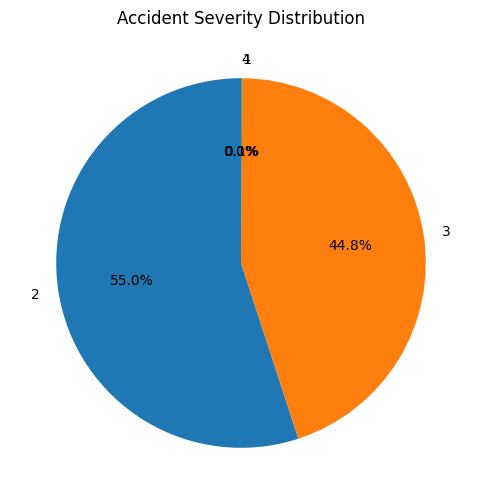

In [23]:
plt.figure(figsize=(6,6))
plt.pie(severity_counts, labels=severity_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Accident Severity Distribution")
plt.show()